# CS215: Intro to Algorithms

In [1]:
import math

# Big $\Theta$ Notation

Big $\Theta$ notation is similar to "Big O" notation - they are used to discuss running times / complexity.

### This time

* tools for analyzing growth rates ($\Theta$, etc.)
* develop a feel for networks

#### Divisible by five?

In [2]:
cat numbers.txt

361 636 277 129 434 577 796 596 727 566
156 109 714 716 546 979 366 766 137 243
331 999 922 304 657 314 634 303 677 597
363 174 431 193 361 677 403 926 279 692
749 401 346 202 763 314 333 244 796 697
674 651 517 349 337 667 617 464 379 793
542 464 962 146 946 199 302 699 606 126
519 203 137 517 146 724 696 699 747 663
126 247 469 953 396 502 562 647 364 214
346 646 331 426 763 291 557 764 939 656
753 561 797 224 537 361 263 493 196 162
362 102 629 936 663 279 966 241 907 677
945 416 122 563 667 394 654 592 977 177
666 199 463 561 954 924 991 363 754 754
199 451 796 566 629 651 517 167 704 749
622 299 466 559 973 243 639 276 603 753


Is the product of all these numbers divisible by five? Try brute force...

In [3]:
product = 1
with open('numbers.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        nums = line.strip()
        nums = nums.split()
        for num in nums:
            product *= int(num)
            
print product

# too big for a float
# prod_by_five = product / 5.0

prod_by_five = product % 5 == 0
print prod_by_five

171192864777233549255068881274005401558777171039798036744818609669843734330346816426150061924155820244836996637449790903552415014642058337271828866386556618039562952477661977138569695691285036698665674025417491917606777585659643586959178806651355129245923986811313798093515276329798098180886583095811837470122071789851130105424828203575529881903664994314012015807489594333594315028629517554734983527139544321993096023097999360
True


Better - count all the numbers and see if _any_ of them are divisible by five.

In [4]:
prod_by_five = False
with open('numbers.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        nums = line.strip()
        nums = nums.split()
        for num in nums:
            if int(num) % 5 == 0:
                prod_by_five = True
                break
            
print prod_by_five

True


#### Graphs / Networks

* nodes (vertices)
* edges (links)

(Usually people who say "nodes" also say "links".) Our links are not directed and they only connect two nodes.

Look at "Chain Networks":

* n = 5 nodes
* m = 4 edges

Chain nodes with `n` nodes always have `n - 1` edges.

#### Ring Network

Complete the loop of a chain network.

* n = 5 edges
* m = 5 edges

etc.

We will look at graphs as dictionaries of dictionaries where the key is the node and the value is the number of connections (or a dictionary). So

    {0: {1: 2, 2: 1}}
    
represents a graph with nodes 0, 1, and 2, with a single connection between 0 and 1, and a single connection between 0 and 2.

In [5]:
def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    G[node1][node2] = 1
    if node2 not in G:
        G[node2] = {}
    G[node2][node1] = 1

In [6]:
# make an empty graph
a_ring = {}

n = 5

# add in edges
for i in range(n):
    # print i, (i+1)%n
    make_link(a_ring, i, (i+1)%n)
    
# how many nodes
print len(a_ring)

# how many edges
print sum([len(a_ring[node]) for node in a_ring.keys()])/2

print a_ring

5
5
{0: {1: 1, 4: 1}, 1: {0: 1, 2: 1}, 2: {1: 1, 3: 1}, 3: {2: 1, 4: 1}, 4: {0: 1, 3: 1}}


#### Grid Network

* n = 20
* m = 15 + 16 = 31

How many edges in a grid of 256 nodes?

In [7]:
math.sqrt(256)

16.0

Therefore, there are 15 linkages across a row and 16 down:

    * - * - * - * ... - *    # 16 nodes, 15 edges
    
And a linkage per node between rows, with 15 spots between rows:

    *    *    *    ...  *
    |    |    |         |
    *    *    *         *

In [8]:
15*16 + 16*15

480

In [9]:
G = {}
n = 256
side = int(math.sqrt(256))

# add edges
for i in range(side):
    for j in range(side):
        if i < side - 1:
            make_link(G, (i, j), (i + 1, j))
        if j < side - 1:
            make_link(G, (i, j), (i, j + 1))
            
print len(G)
print sum([len(G[node]) for node in G.keys()])/2

256
480


How many edges in a square grid graph?

\begin{equation}
\begin{split}
N =&~ 2 (\sqrt{n} - 1) \sqrt{n} \\
=&~ 2 n - 2 \sqrt{n} \\
\end{split}
\end{equation}

#### Big OH - Asymptotic Growth

\begin{equation}
2 n - 2 \sqrt{n} \in \Theta(n)
\end{equation}

* $\Theta(g(n))$: The set of functions that grow "equally" quickly as $g(n)$.
* $f(n) \in \Theta(g(n))$ iff $\exists$ $c_1, c_2, n_0$ $\forall n > n_0$, $0 \leq c_1 g(a) \leq f(a) \leq c_2 g(n)$

#### Big $\Theta$ Reflexive

If $f(n) \in \Theta(g(n))$, is $g(n) \in \Theta(f(n))$?

Yes, because $1/c_1$ and $1/c_2$ sandwich $g$ by $f$. Recall, the definition of $\Theta$. This implies $\exists$ $c_1, c_2, n_0$ $\forall n > n_0$, $0 \leq g(a) \leq  \frac{1}{c_1} f(a) \leq \frac{c_2}{c_1} g(n)$. Also, we have $\exists$ $c_1, c_2, n_0$ $\forall n > n_0$, $0 \leq \frac{c_1}{c_2} g(a) \leq  \frac{1}{c_2} f(a) \leq g(n)$. Therefore, we may combine these to show $\exists$ $c_1, c_2, n_0$ $\forall n > n_0$, $0 \leq \frac{1}{c_2} g(a) \leq f(a) \leq \frac{1}{c_1} g(n)$. 

We may, of course, re-write this as: $\exists$ $c_1, c_2, n_0$ $\forall n > n_0$, $0 \leq c_1 g(a) \leq f(a) \leq c_2 g(n)$ since the $c_i$ are just constants.

#### Big-Theta Examples

* $\frac{1}{2} n^2 \in \Theta(n^2)$
* $8 \sqrt{n}  \in \Theta(\sqrt{n})$
* $2n - 2\sqrt{n} \in \Theta(n)$
* $7n^4 + 2n^3 - 4n \log n + \sqrt{n} \in \Theta(n^4)$
* $\ln n \in \Theta(\log n)$    # any base - like $\log_2 n$, etc.
* $\pi^2 \in \Theta(1)$

#### Showing Grid Edges Grow Linearly

We want to show:

\begin{equation}
2 n  - 2 \sqrt{n} \in \Theta(n)
\end{equation}

Need $c_1, c_2, n_0$ such that $n > n_0$, $0 \leq c_1 n \leq 2 n - 2 \sqrt{n}$ and $2 n - 2 \sqrt{n} \leq c_2 n$.

\begin{equation}
\begin{split}
c_2 n \geq&~ 2n - 2\sqrt{n} \\
\geq&~ 2 - 2 \frac{\sqrt{n}}{n} \\
&\Rightarrow c_2 \to 2 ~\text{random choice, not a solved equation}
\end{split}
\end{equation}

For the next inequality, suppose we choose $c_1 = 1$. Our inequality won't hold for all $n$, but it will hold for some of them:

\begin{equation}
\begin{split}
n \leq&~ 2n - 2\sqrt{n}\\
2 \leq&~ \sqrt{n} \\
4 \leq&~ n
\end{split}
\end{equation}

This gives us $n_0 = 4$ to define the range where our bounds hold.

In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt

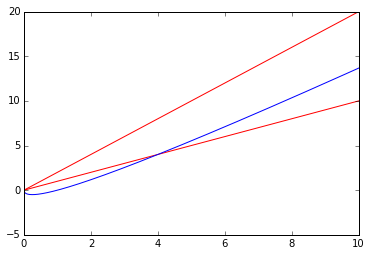

In [12]:
x = np.linspace(0, 10, 1000, endpoint=True)
y1 = x
y2 = 2 * x - 2 * np.sqrt(x)
y3 = 2 * x
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='blue')
plt.plot(x, y3, color='red')

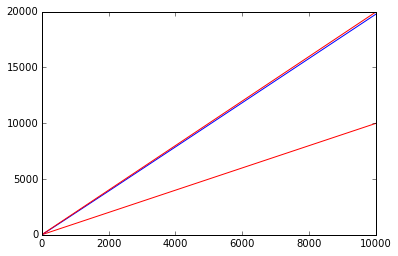

In [13]:
x = np.linspace(0, 10000, 1000, endpoint=True)
y1 = x
y2 = 2 * x - 2 * np.sqrt(x)
y3 = 2 * x
plt.plot(x, y1, color='red')
plt.plot(x, y2, color='blue')
plt.plot(x, y3, color='red')

#### Complete Set

$\Theta$ is just one of a bunch of different functions we can define:

* $f(n) \in o(g(n)) \approx f(n) < g(n)$
* $f(n) \in O(g(n)) \approx f(n) \leq g(n)$
* $f(n) \in \Theta(g(n)) \approx f(n) = g(n)$
* $f(n) \in \Omega(g(n)) \approx f(n) \geq g(n)$
* $f(n) \in \omega(g(n)) \approx f(n) > g(n)$

After some guesses...
\begin{equation}
\begin{split}
2 n^2 + 6 n + 20 \log n \in&~ \Theta(n^2) \\
2 n^2 + 6 n + 20 \log n \in&~ \Theta(2 n^2 + 6 n + 20 \log n) \\
2 n^2 + 6 n + 20 \log n \in&~ \Theta(20 n^2) \\
\end{split}
\end{equation}

And more, obviously...

#### Planar Graph

May be drawn in a plane and edges don't cross.

Suppose $n = 5$ and $m = 5$. It turns out $m < 9$.

#### Euler Returns!

Regions are areas that are "boxed off" in a graph (plus the outside). Euler has a relation: For any planar graph

\begin{equation}
n - m + r = 2
\end{equation}

Where $n$ counts nodes, $m$ counts edges, and $r$ counts regions.

#### Regions in a Planar Graph

How many regions (can't draw the graph here easily...)?

#### Euler's Formula

\begin{equation}
n - m + r = 2
\end{equation}

We can build any planar graph by adding nodes and edges.

We will proves Euler's Formula by induction. $n = 1$, $m = 0$, $r = 1$ $\Rightarrow$ Euler holds - this is our _base case_.

Suppose we have a planar graph. We can grow the graph by doing one of two things.

1. add an edge and a node together
2. add an edge only

For (1), we have
\begin{equation}
(n + 1) - (m + 1) + r = n - m + r = 2
\end{equation}

For (2) we have
\begin{equation}
n - (m + 1) + (r + 1) = n - m + r = 2
\end{equation}

#### Growth Rate of Edges in Planar Graphs

A region must be bounded by at least three edges. To avoid double counting, this looks like:

\begin{equation}
\begin{split}
3 r \leq&~ 2 m\\
\text{Euler:}~ m + 2 =&~ n r \leq n + \frac{2}{3} m \\
3 m + 6 \leq&~ 3 n + 2 m \\
m \leq&~ 3n - 6 \in \Theta(n)
\end{split}
\end{equation}

#### Recap

Chain, Ring, Grid, Planar graph all have $m \in \Theta(n)$. Is this always the case for graphs? No. Complete graphs (or "cliques") have every node connected to every node.

Suppose we have a complete

* n = 5
* m = 10

What is the general rule?

In [14]:
def clique(n):
    # return the number of edges
    c = n
    e = 0
    while c > 0:
        e += (c - 1)
        c -= 1
    return e

In [15]:
for i in range(20):
    print i, clique(i), i*(i-1)/2

0 0 0
1 0 0
2 1 1
3 3 3
4 6 6
5 10 10
6 15 15
7 21 21
8 28 28
9 36 36
10 45 45
11 55 55
12 66 66
13 78 78
14 91 91
15 105 105
16 120 120
17 136 136
18 153 153
19 171 171


In [16]:
def clique(n):
    return n * (n - 1) /2

In [17]:
def gen_complete_graph(n):
    G = {}
    for i in range(n):
        for j in range(n):
            if i < j:
                make_link(G, i, j)
                
    return G

In [18]:
gr = gen_complete_graph(5)

In [19]:
gr

{0: {1: 1, 2: 1, 3: 1, 4: 1},
 1: {0: 1, 2: 1, 3: 1, 4: 1},
 2: {0: 1, 1: 1, 3: 1, 4: 1},
 3: {0: 1, 1: 1, 2: 1, 4: 1},
 4: {0: 1, 1: 1, 2: 1, 3: 1}}

In [20]:
sum([len(gr[node]) for node in gr.keys()])/2

10

In [21]:
def get_num_nodes_from_graph(gr):
    n = sum([len(gr[node]) for node in gr.keys()])/2
    return n

In [22]:
for i in range(10):
    gr = gen_complete_graph(i)
    print get_num_nodes_from_graph(gr)

0
0
1
3
6
10
15
21
28
36


#### Hypercube

`n`: power of 2

Every node has a label that is a bit pattern and connect to all nodes if their bit pattern differ in exactly one place.

So, for 4 nodes: `00` - `01` - `11` - `10` - back to `00` (a square)

For 8, we draw a "3D cube".

For 16 - nice trick - draw two 8 node cubes and then prepend a `0` in front of one of them and a `1` in front of the other. Now we connect all the "mirrored" nodes to each other (only) because they all differ by one bit in the pattern.

#### How many edges in an `n`-node hypercube?

    2       1
    4       4     = 1 * 2 + 2
    8       12    = 4 * 2 + 4
    16      32    = 12 * 2 + 8

In [23]:
def hypercube_num_edges(n):
    nodes = 2
    edges = 1
    while nodes < n:
        edges = edges * 2 + nodes
        nodes *= 2
    if nodes == n:
        return edges
    else:
        print "nodes were not a power of 2"
        return 0

In [24]:
[hypercube_num_edges(i) for i in [2, 4, 8, 16, 32, 64, 128, 256]]

[1, 4, 12, 32, 80, 192, 448, 1024]

What is $\Theta(n)$?

In [25]:
[hypercube_num_edges(i) / float(i) for i in [2, 4, 8, 16, 32, 64, 128, 256]]

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

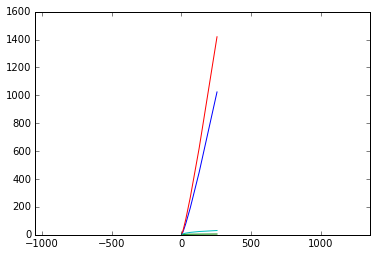

In [26]:
xx = [2, 4, 8, 16, 32, 64, 128, 256]
yy = [hypercube_num_edges(i) for i in xx]
tt = [math.log(i) for i in xx]
uu = [i*math.log(i) for i in xx]
vv = [math.log(i)*math.log(i) for i in xx]

plt.plot(xx, yy)
plt.axes().set_aspect('equal', 'datalim')
plt.plot(xx, tt)
plt.plot(xx, uu)
plt.plot(xx, vv)

For `n=4`, the number of bits in an edge is `log n`. So, `n * log n` double counts the edges coming from a node, making the exact formula more like `(n/2) * log n`. Therefore we are in $\Theta \sim n \log n$. 

In [27]:
[(i/2) * math.log(i, 2) for i in [2, 4, 8, 16, 32, 64, 128, 256]]

[1.0, 4.0, 12.0, 32.0, 80.0, 192.0, 448.0, 1024.0]

#### Tree Graphs

Tree graphs have two properties:

* they are connected,
* and no cycles or loops.

#### Randomly Generated Graphs

So far we have discussed:

* chains
* rings
* grids
* hypercubes
* trees

But real graphs, like we see in social networks, are much messier.

#### Erdos-Renyi Model

* `n` nodes
* connectivity probability `p`

1. generate `n` nodes
2. for each node pair `(i, j)`, connect them with probability `p`

What is the probability `p` required to make the graph reasonably likely to be connected?

However, these graphs don't really look much like what we see in social networks.

#### Some Recursive Graphs

1. `n` nodes
2. create graph on `n/2` nodes
3. create graph on other `n/2` nodes
4. generate edges between the two smaller graphs
5. return graph

Pseudo Python:

    def makeG(n):
        if n == 1:
            return a single node
        G1 = makeG(n/2)
        G2 = makeG(n/2)
        i1 = random node from G1
        i2 = random node from G2
        make_link(G, i1, i2)

Suppose we have 8 nodes:

1. make a 4 and 4
2. down the first 4 rabbit hole, make 2 and 2
3. down the first 2, make a 1 and 1
4. connect the one and one
5. down the second 2, make a 1 and 1
6. connect the one and one
...

A bit easier to see with 4 - it must be a chain for 4. But, for eight, since we can connect any random nodes between the two "4"s, the real graph must be a tree (and chain is a subtype of tree).

The "official" solution was very nice and showed a _basic_ method to use in this sort of case, rather than start with 8 and try to reason about it, do 1, then 2, then 4, etc., which is more or less what I did in the end, but cleaner.

#### Recurrence Relations

We can make a recurrence relation for our random graph generator:

    T: # of edges
    T(1) = 0
    T(n) = 2 T(n/2) + 1

<img src="Screen_Shot_2015-11-09_at_5.39.22_AM.png">

In [28]:
math.log(4, 2)

2.0

In [29]:
math.log(8, 2)

3.0

The depth must be `log n` (base 2), and the number of leaves at the bottom must be `n`. A nice way to think about the number of leaves is it will be $2^{\text{depth}}$, but this means:

\begin{equation}
\begin{split}
2^d =&~ 2^{\log_2 n} \\
=&~ n \\
\end{split}
\end{equation}

#### Number of Edges

The total number of edges is $0 + n + n/2 + n/4 + \cdots + 2 + 1$ for the bottom, second to the bottom, etc. to the top layer. This is basically $2n = \Theta(n)$.

#### N Squared

Another randomly generated graph:

    def makeG(n):
        if n == 1:
            return a node
        G1 = makeG(n/2)
        G2 = makeG(n/2)
        s1 = random n/4 nodes from G1
        s2 = random n/4 nodes from G2
        for all il in s1 and i2 in s2:
            make_link(G, i1, i2)
        return G
        
Analysis:

    T(1) = 0
    T(n) = 2 T(n/2) + (n/4)^2
         = 2 T(n/2) + \Theta(n^2)

<img src="Screen_Shot_2015-11-09_at_5.55.36_AM.png">

#### Last Random Graph

    def makeG(n):
        if n == 1:
            return a node
        G1 = makeG(n/2)
        G2 = makeG(n/2)
        i1 = list of nodes of G1 in random order
        i2 = list of nodes of G2 in random order
        for i in range(n/2):
            make_link(G, i1[i], i2[i])
        return G

* `n == 1`: solo node:   `*`
* `n == 2`: two nodes, linked:   `*--*`
* `n == 4`: four nodes in a ring or a twisted ring (topologically the same)
* `n == 8`: two rings with random connections between all corners
* `n == 16`: two 8's with random connections between all

The not-obvious thing - are these hypercubes? Probably need to draw pictures... They aren't hypercubes - we can draw things that are topologically distinct at the eight stage, e.g.

    1  2     3  4
    *--*     *--*     + 1-3, 5-7, 2-8, 6-4
    |  |     |  |
    *--*     *--*     distinct from 1-3, 5-7, 2-4, 6-8
    5  6     7  8    

#### Analysis of "Tangled Hypercube"

    T(1) = 0
    T(n) = 2 T(n/2) + n
    => T(n) \in \Theta(n \log n)

<img src="Screen_Shot_2015-11-10_at_5.38.30_AM.png">

#### Recap

<img src="Screen_Shot_2015-11-10_at_5.42.37_AM.png">

# Problem Set 2

## Star Network

A star network has a single node in the center that is connected to all the rest of the nodes in the graph.

Python program that returns the number of edges in a star network with `n` nodes...

In [30]:
def star_network(n):
    if n == 0 or n == 1:
        return 0
    return n-1

In [31]:
[(i, star_network(i)) for i in range(10)]

[(0, 0),
 (1, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 4),
 (6, 5),
 (7, 6),
 (8, 7),
 (9, 8)]

### Recurrence Relation

Template for random graph:

    def makeG(n):
        if n == 1:
            return <a single node>
        g1 = makeG(n / 2)
        g2 = makeG(n / 2)
        for i in range(log(n)):
            i1 = <random node from g1 w/o replacement>
            i2 = <random node from g2 w/o replacement>
            make_link(G, i1, i2)
        return G

Recurrence:

    T(1) = 0
    T(n) = 2 T(n / 2) + \Theta(\log n)

In [32]:
for i in range(0):
    print i

In [33]:
for i in range(1):
    print i

0


In [34]:
for i in range(int(1.1)):
    print i

0


In [35]:
math.log(2, 2)

1.0

The depth looks like `log n` and the connections per layer looks like `log n`, `2 * 1/2 * log n`, `4 * 1/4 * log n`, etc., so the recurrence relation looks like `(log n)^2`? 

### Subsets

    X               Y              XcY   YcX   Both   Neither
    ---------------------------------------------------------
    star            tree            o
    planar graph    tree                  o
    tree            ring                                 o
    ring            chain                                o
    chain           tree            o
    hypercube       ring                                 o
    grid            chain                                o
    planar graph    hypercube                            o

Recall

* star graphs are a central node with spokes
* trees are connected with no cycles or loops
* planar graphs may be drawn in a plane with no crossing edges
* rings are loops
* chains have `m` nodes and `m-1` edges (non-"completing" ring graphs)
* hypercubes have `n` nodes where `n` is a power of 2, and every node has a label that is a bit pattern and connect to all nodes if their bit pattern differ in exactly one place.
* grids are grids...

From solutions:

* not all planar graphs are trees, but all trees are planar graphs
* rings must have cycles and trees cannot
* edges in a chain is `nodes - 1`, edges in a ring must be equal to number of `nodes`
* all cahins are trees, not all trees are chains
* hypercubes are not rings in general, and rings are not hypercubes in general
* all chains are grids, but not all grids are chains (`*-*-*` is a `1xn` grid and chain) 



### Function Comparison

$4 n^2 + (\log n)^7 + 9 n (\log n)^2 + n^{2/3}$ is in $\Theta()$ of what? - $n^2$ And it is $O()$ of what? The _smallest_ $O()$ of is $O(n^2)$, but, being in $O(n^2)$, it is also in $O(n^3)$, etc.

### Planar Graphs

If we draw a planar graph with 8 nodes and 15 edges, how many regions are there?

For any planar graph, `n - m + r = 2`, so there are 9 regions.

### Combination Lock

A "combination lock" is a graph on `n` nodes with edges in a chain and the edges in a star, with the left end of the chain as the center of the star.

What is $\Theta(n)$ for the number of edges?

The formula for the number of edges is `2 * (n - 1)`, so this is $\in \Theta(n)$.

### Combination Lock, part II

Write a Python program to create a combination lock given a list of nodes.

In [1]:
def make_link(G, node1, node2):
    if node1 not in G:
        G[node1] = {}
    (G[node1])[node2] = 1
    if node2 not in G:
        G[node2] = {}
    (G[node2])[node1] = 1
    return G

In [2]:
# testing code

def is_chain(graph, nodes):
    # find the first node with degree one
    start = (n for n, e in graph.iteritems()
             if len(e) == 1).next()
    count = 1
    # keep track of what we've seen to make
    # sure there are no cycles
    seen = set([start])
    # follow the edges
    prev = None
    current = start
    while True:
        nexts = graph[current].keys()
        # get rid of the edge back to prev
        nexts = [n for n in nexts if not n == prev]
        if len(nexts) > 1:
            # bad.  too many edges to be a chain
            return False
        elif len(nexts) == 0:
            # We're done following the chain
            # Did we get enough edges:
            return count == len(nodes)
        prev = current
        current = nexts[0]
        if current in seen:
            # bad.  this isn't a chain
            # it has a loop
            return False
        seen.add(current)
        count += 1

def is_combo_lock(graph, nodes):
    # first see if we have a star
    center = None
    degree = None
    for node, edges in graph.iteritems():
        if len(edges) > degree:
            center = node
            degree = len(edges)
    if not degree == len(nodes) - 1:
        return False
    # make a graph out of all the edges
    # not connected to the center
    chain = {}
    for node, edges in graph.iteritems():
        if node == center:
            continue
        for e in edges:
            if e == center:
                continue
            make_link(chain, node, e)
    return is_chain(chain, [n for n in nodes if n != center])

def test():
    for n in [5, 10, 20]:
        combo = create_combo_lock(range(n))
        if not is_combo_lock(combo, range(n)):
            return False
    return True

In [3]:
cat combo_lock_graphy.py

#!/usr/bin/env python

from graph_utils import make_link


def create_combo_lock(nodes):
    G = {}
    nnodes = len(nodes)
    # first, make a chain graph
    for i in range(nnodes - 1):
        make_link(G, nodes[i], nodes[i + 1])
    # second, add the star
    for i in range(1, nnodes):
        make_link(G, nodes[0], nodes[i])
    return G


def is_chain(graph, nodes):
    # find the first node with degree one
    # here, the list comprehension creates a generator object holding (if
    # this is a chain) the first and last nodes; `.next()` gets the first
    # item out of the generator
    start = (n for n, e in graph.iteritems()
             if len(e) == 1).next()
    count = 1
    # keep track of what we've seen to make
    # sure there are no cycles
    seen = set([start])
    # follow the edges
    prev = None
    current = start
    while True:
        nexts = graph[current].keys()
        # get rid of the edge back to prev
        nexts = [n for n in nexts if not n == prev]
 

### Erdos-Renyi

Imagine generating an Erdos-Renyi graph with n=256 and p=0.25. On average, how many edges will it have?

If there are 256 nodes, there are 

\begin{equation}
n = \frac{256 \times 255}{2} = 32,640
\end{equation}

_pairs_ of nodes. If there is a 0.25% chance of making a connection, we expect 

\begin{equation}
\bar{x} = \frac{256 \times 255}{2} \times 0.25 = 8,160
\end{equation}

edges on average.

In [40]:
256*255/2

32640

In [41]:
256*255/2/4.0

8160.0